In [0]:
# [事前作業]
# -ランタイムメニューからGPUを設定しておく

# darknetをcloneしていなければ、clone
# /contentはgoogle colab上の作業ディレクトリ
%%bash
if [ ! -d "/content/darknet" ]; then
  cd /content
  git clone https://github.com/pjreddie/darknet
  cd ./darknet
  # GPUモードでdarknetをmakeする
  sed -i 's/GPU=0/GPU=1/g' Makefile
  make
fi

In [0]:
# ここから先は/content/darknet配下をカレントディレクトリとして作業
%cd /content/darknet

/content/darknet


In [0]:
# google driveとマウント
from google.colab import drive
drive.mount('/content/gdrive')


In [0]:
# ここから先はマウントしたディレクトリで作業
SAMPLE_DIR="/content/gdrive/My Drive/coin"
%cd "{SAMPLE_DIR}"

# backupディレクトリを作っておく必要がある
! mkdir backup 

/content/gdrive/My Drive/coin


In [0]:
%cd "{SAMPLE_DIR}"

# darknetのdata/labelsをコピーする
# そうしないと、Cannot load image "data/labels/32_0.png"といったエラーが発生する
# https://github.com/pjreddie/darknet/issues/335
! cp -R /content/darknet/data/labels/ "{SAMPLE_DIR}"/data

/content/gdrive/My Drive/coin


In [0]:
# 予測実行
DATA = f"{SAMPLE_DIR}/data/obj.data"
CONFIG = f"{SAMPLE_DIR}/yolov3.cfg"
# ここでは、yolov3_final.weightsを使う
WEIGHTS = f"{SAMPLE_DIR}/backup/yolov3_final.weights"
TARGET_IMG = f"{SAMPLE_DIR}/IMG_0411_frame_1.jpg"

! /content/darknet/darknet detector test "{DATA}" "{CONFIG}"  "{WEIGHTS}" "{TARGET_IMG}"

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

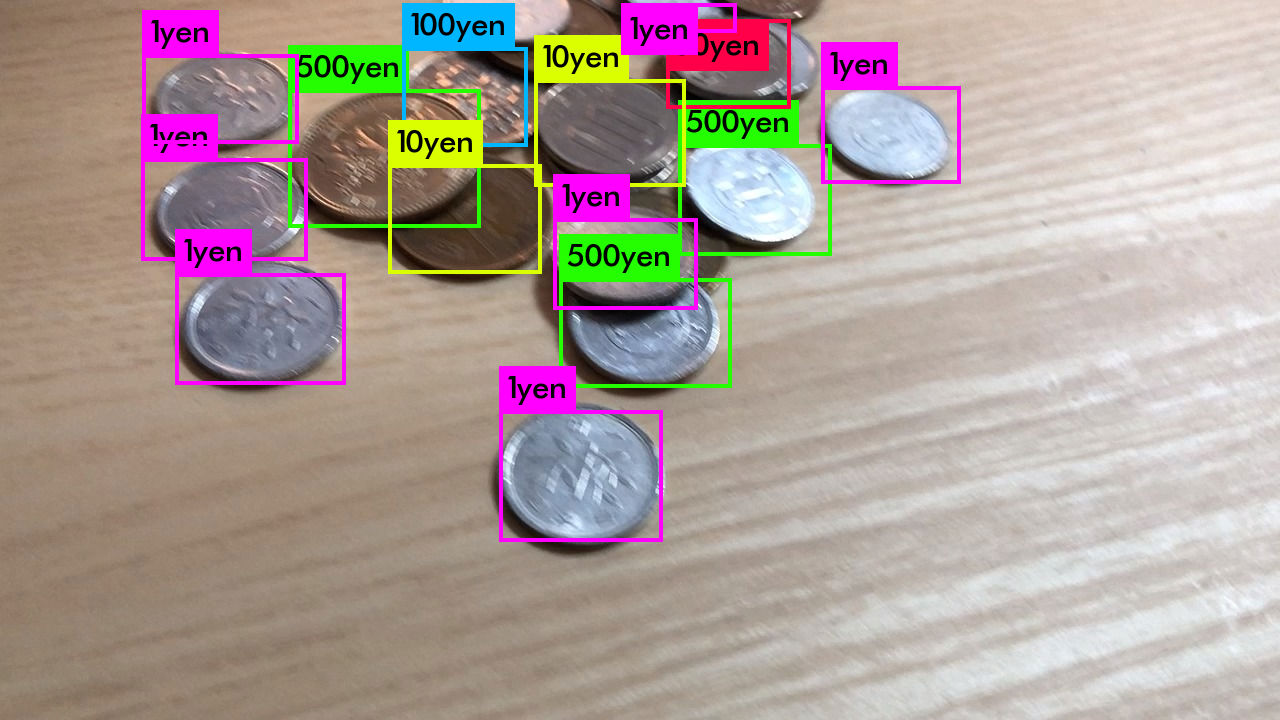

In [0]:
from IPython.display import Image, display
display(Image(f"{SAMPLE_DIR}/predictions.jpg"))